In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## cargamos el data set
df = pd.read_csv('dataset_fish.csv')

In [3]:
## info data ser 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
## graficamos el data set
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
## columnas que nos interesan
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
## aconvertinmos las species a numeros
df.Species = df.Species.map({'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7})

In [7]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
##unique species
df.Species.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [10]:
## redondeamos los valores
corr = round(df.corr(), 4)
corr.style.background_gradient()

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.176800,-0.101200,-0.118400,-0.209500,-0.697000,-0.315200
Weight,-0.176800,1.000000,0.915700,0.918600,0.923000,0.724300,0.886500
Length1,-0.101200,0.915700,1.000000,0.999500,0.992000,0.625400,0.867000
Length2,-0.118400,0.918600,0.999500,1.000000,0.994100,0.640400,0.873500
Length3,-0.209500,0.923000,0.992000,0.994100,1.000000,0.703400,0.878500
Height,-0.697000,0.724300,0.625400,0.640400,0.703400,1.000000,0.792900
Width,-0.315200,0.886500,0.867000,0.873500,0.878500,0.792900,1.000000


<Axes: >

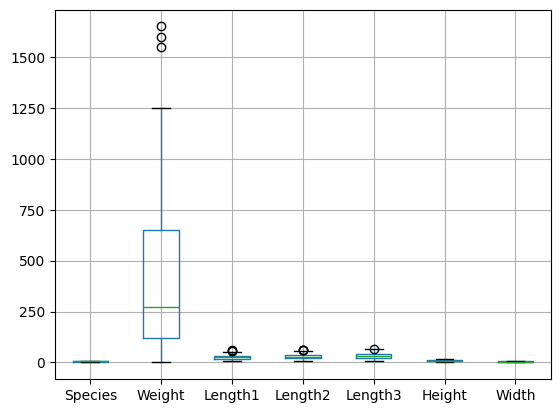

In [11]:
df.boxplot()

In [12]:
## eliminamos las colunas 
data_x = df.drop(['Species', 'Weight'], axis=1)
data_y = df.Weight

In [13]:
data_x

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [14]:
## dividims el set en partes 
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)

In [15]:
## creamos el modelo
linear_reg = LinearRegression()

In [16]:
## el fit lo usamos
linear_reg.fit(train_x, train_y)

LinearRegression()

In [17]:
## predecimos
y_predicted = linear_reg.predict(test_x)

In [18]:
train_x

,Length1,Length2,Length3,Height,Width
112,34.0,36.5,39.0,10.8810,6.8640
54,29.5,31.7,35.0,9.4850,5.3550
46,21.0,22.5,25.0,6.5500,3.3250
109,30.5,32.8,34.0,10.0300,6.0180
52,24.0,26.0,29.2,8.8768,4.4968
...,...,...,...,...,...
144,59.0,63.4,68.0,10.8120,7.4800
11,28.7,31.0,36.2,14.3714,4.8146
123,39.0,42.0,44.6,12.8002,6.8684
1,24.0,26.3,31.2,12.4800,4.3056


In [19]:
print(f'Calificacion de prediccion:{round(linear_reg.score(test_x, test_y),4) * 100 }%')

Calificacion de prediccion:88.84%
